# Begin: run but don't change

In [28]:
%matplotlib inline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [29]:
if sys.platform == 'linux':
    !pip install openpyxl

In [30]:
def makeConfusionMatrix(truthName, testName):
    
    notNANs = pd.notnull(df[truthName].values) & pd.notnull(df[testName].values)
    
    true = list(df[truthName].values[notNANs])
    test = list(df[testName].values[notNANs])
    
    cm = confusion_matrix(true, test)
    dispCompact = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative', 'positive'])
    dispCompact.plot()
    plt.title('True: %s    Test: %s' % (truthName, testName));

In [31]:
df = pd.read_excel("Data_ EC-Kit_Products_Evaluation_E Coli Tab Only_3-7-19.xlsx", skiprows=2)
df = df.drop(index=[0])
df = df.drop(index=range(63, 182))
df = df.drop(columns=['Unnamed: 11'])
df.head(n=100)

,Unnamed: 0,"IDEXX (Mark, ignore this column)",IDEXX,Colilert P/A vials,Compact Dry 1mL,"ECC 1 mL, 24 hr",ECC 10mL 24 hr,RUG 24 hr,RUG 48 hr,ECC 1 mL 48 hr,ECC 10mL 48 hr
1,50a,387.9,1,0,1,1,1,1,1,1,1
2,50b,90.9,1,0,1,1,1,1,1,1,1
3,51a,0,0,0,0,0,0,0,0,0,1
4,51b,0,0,0,0,0,0,0,0,0,1
5,52a,0,0,0,0,0,0,0,0,0,0
6,52b,1,1,0,0,0,0,0,0,0,0
7,53a,2,1,1,0,0,1,0,1,0,1
8,53b,4.1,1,0,1,0,1,1,1,0,1
9,54a,69.1,1,1,0,0,1,1,1,0,1
10,54b,47.1,1,1,1,0,1,NaN,1,0,1


# End: run but don't change

# Here are the names to use for truth and test:

In [32]:
df.columns[2:]

Index(['IDEXX', 'Colilert P/A vials', 'Compact Dry 1mL', 'ECC 1 mL, 24 hr',
       'ECC 10mL 24 hr', ' RUG 24 hr', 'RUG 48 hr', 'ECC 1 mL 48 hr',
       'ECC 10mL 48 hr'],
      dtype='object')

# Choose ground truth and test here from names above:

In [33]:
truthName = 'IDEXX'
testName = 'ECC 1 mL, 24 hr'

# Plot the confusion matrix here:

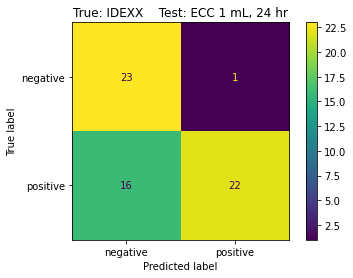

In [34]:
makeConfusionMatrix(truthName = truthName,  testName = testName)

# Pivot Table analysis

In [35]:
def pivot_table(df, values, index, columns, aggfunc):
    
    df = df[[values] + index + columns]
    df = df.dropna()
    
    table = pd.pivot_table(df, values=values, index=index, columns=columns, aggfunc=aggfunc)
    return table, df
    

In [36]:
index = ['IDEXX']
columns = ['ECC 1 mL, 24 hr']
values = 'Compact Dry 1mL'
aggfunc = np.sum

In [37]:
table,df_pivot  = pivot_table(df, values=values, index=index, columns=columns, aggfunc=aggfunc)
print("Values in pivot table below: %s" % values)
table

Values in pivot table below: Compact Dry 1mL


"ECC 1 mL, 24 hr",0,1
IDEXX,,
0,0.0,NaN
1,2.0,15.0


In [39]:
df_pivot

,Compact Dry 1mL,IDEXX,"ECC 1 mL, 24 hr"
1,1,1,1
2,1,1,1
3,0,0,0
4,0,0,0
5,0,0,0
6,0,1,0
7,0,1,0
8,1,1,0
9,0,1,0
10,1,1,0
